In [56]:
! wget https://raw.githubusercontent.com/shenweichen/DeepMatch/master/examples/preprocess.py -O preprocess.py

! pip uninstall -y -q tensorflow
! pip install -q tensorflow-gpu==2.8.0
! pip install -q deepmatch

--2024-05-28 06:05:44--  https://raw.githubusercontent.com/shenweichen/DeepMatch/master/examples/preprocess.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6705 (6.5K) [text/plain]
Saving to: ‘preprocess.py’

preprocess.py       100%[===================>]   6.55K  --.-KB/s    in 0s      

2024-05-28 06:05:45 (62.0 MB/s) - ‘preprocess.py’ saved [6705/6705]



In [115]:
import pandas as pd
import deepctr
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from deepctr.models import *

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split

In [116]:
data = pd.read_csv('sample_text.txt')
data.head(2), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   200 non-null    int64  
 1   I1      110 non-null    float64
 2   I2      200 non-null    int64  
 3   I3      166 non-null    float64
 4   I4      165 non-null    float64
 5   I5      194 non-null    float64
 6   I6      149 non-null    float64
 7   I7      190 non-null    float64
 8   I8      200 non-null    float64
 9   I9      190 non-null    float64
 10  I10     110 non-null    float64
 11  I11     190 non-null    float64
 12  I12     43 non-null     float64
 13  I13     165 non-null    float64
 14  C1      200 non-null    object 
 15  C2      200 non-null    object 
 16  C3      191 non-null    object 
 17  C4      191 non-null    object 
 18  C5      200 non-null    object 
 19  C6      168 non-null    object 
 20  C7      200 non-null    object 
 21  C8      200 non-null    object 
 22  C9

(   label  I1  I2     I3    I4       I5     I6   I7    I8     I9  ...  \
 0      0 NaN   3  260.0   NaN  17668.0    NaN  NaN  33.0    NaN  ...   
 1      0 NaN  -1   19.0  35.0  30251.0  247.0  1.0  35.0  160.0  ...   
 
         C17       C18  C19  C20       C21  C22       C23       C24  C25  C26  
 0  e5ba7672  87c6f83c  NaN  NaN  0429f84b  NaN  3a171ecb  c0d61a5c  NaN  NaN  
 1  d4bb7bd8  6fc84bfb  NaN  NaN  5155d8a3  NaN  be7c41b4  ded4aac9  NaN  NaN  
 
 [2 rows x 40 columns],
 None)

In [117]:
sparse_features = ['C' + str(i) for i in range(1, 27)]
dense_features = ['I' + str(i) for i in range(1, 14)]

sparse_features, dense_features, data.columns

(['C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14',
  'C15',
  'C16',
  'C17',
  'C18',
  'C19',
  'C20',
  'C21',
  'C22',
  'C23',
  'C24',
  'C25',
  'C26'],
 ['I1',
  'I2',
  'I3',
  'I4',
  'I5',
  'I6',
  'I7',
  'I8',
  'I9',
  'I10',
  'I11',
  'I12',
  'I13'],
 Index(['label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
        'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
        'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
        'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
       dtype='object'))

In [118]:
data[sparse_features] = data[sparse_features].fillna('-1', )
data[dense_features] = data[dense_features].fillna(0, )
data.head(2)

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.0,3,260.0,0.0,17668.0,0.0,0.0,33.0,0.0,...,e5ba7672,87c6f83c,-1,-1,0429f84b,-1,3a171ecb,c0d61a5c,-1,-1
1,0,0.0,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,...,d4bb7bd8,6fc84bfb,-1,-1,5155d8a3,-1,be7c41b4,ded4aac9,-1,-1


In [119]:
target = ['label']

In [120]:
# giving each element as unique ID with LabelEncoder
# just a demo
data_demo = data
for feat in sparse_features:
    lbe = LabelEncoder()
    print(data_demo[feat].unique(), data_demo[feat].nunique())
    data_demo[feat] = lbe.fit_transform(data_demo[feat])
    print(data_demo[feat].unique(), data_demo[feat].nunique())
    break

['05db9164' '68fd1e64' '8cf07265' '5bfa8ab5' '5a9ed9b0' '9a89b36c'
 '2d4ea12b' '39af2607' '241546e0' '09ca0b81' '87552397' 'be589b51'
 'f434fac1' 'f473b8dc' '75ac2fe6' '7e5c2ff4' 'be30ca83' '17f69355'
 'ae82ea21' '98237733' 'fc9c62bb' 'de4dac42' '3b65d647' '52f1e825'
 '0e78bd46' '87773c45' 'da4eff0f'] 27
[ 0 11 16 10  9 18  5  6  4  1 14 21 24 25 12 13 20  3 19 17 26 23  7  8
  2 15 22] 27


In [121]:
# for all the data
num_unique_arr = []
for feat in sparse_features:
    temp = []
    lbe = LabelEncoder()
    temp.append(data[feat].nunique())
    data[feat] = lbe.fit_transform(data_demo[feat])
    temp.append(data[feat].nunique())
    num_unique_arr.append(temp)

## Generating Feature Columns

In [122]:
# transforming features to dense vectors by embedding techniques
fix_length_feature_columns = [deepctr.feature_column.SparseFeat(feat, vocabulary_size=data[feat].max() + 1,embedding_dim=4)
                       for i,feat in enumerate(sparse_features)] + [deepctr.feature_column.DenseFeat(feat, 1,)
                      for feat in dense_features]

In [123]:
fix_length_feature_columns[:2]

[SparseFeat(name='C1', vocabulary_size=27, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x7f537243c700>, embedding_name='C1', group_name='default_group', trainable=True),
 SparseFeat(name='C2', vocabulary_size=92, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x7f5383df1510>, embedding_name='C2', group_name='default_group', trainable=True)]

In [124]:
dnn_feature_columns = fix_length_feature_columns
linear_feature_columns = fix_length_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
feature_names
# is same as get_feature_names(fix_length_feature_columns)

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13']

## Generating training samples and training the model

In [125]:
train, test = train_test_split(data, test_size=0.2)
train.columns, train.shape

(Index(['label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
        'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
        'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
        'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
       dtype='object'),
 (160, 40))

In [126]:
train['C10']

134    81
40     30
195    11
54     30
113    30
       ..
198    96
41     30
169    58
185    30
147    30
Name: C10, Length: 160, dtype: int64

In [127]:
from itertools import islice

def take(iterables, n):
  return list(islice(iterables, n))

In [128]:
train_model_input = {name:train[name].values for name in feature_names}
test_model_input = {name:test[name].values for name in feature_names}
take(train_model_input.items(), 1), take(test_model_input.items(), 1)

([('C1',
   array([18, 24,  0, 21,  0, 16,  0,  0,  0,  9, 10,  0,  1,  9,  0, 16,  0,
          11,  6,  0,  6,  0, 21,  9,  9,  0, 21,  0, 21, 11,  0,  0, 15,  0,
          11, 11, 18,  0,  0, 17,  0,  0, 10,  0, 11,  9,  0,  0, 11, 14, 11,
           2, 11,  0, 11, 11, 16,  0, 16, 11,  0,  0,  0,  0,  0,  0, 19,  9,
           0,  0, 25, 11, 11, 11, 20, 11,  1,  0,  7, 16,  0, 11,  0, 11,  0,
          11,  0,  5,  0,  0, 16,  0, 16,  3,  0,  0, 21,  0, 16, 18,  0,  6,
           0,  9,  6,  0, 11,  0,  0, 19,  0, 16, 11,  0, 12, 11,  0, 26,  0,
          16,  0, 16,  6,  0, 16,  3, 16,  9,  9, 21,  0,  0,  0,  0, 11, 10,
           0,  0, 11,  0, 21,  0,  0,  0, 11,  0,  0, 10,  0,  0,  0,  4,  0,
          25, 11,  0, 11, 16,  9, 11]))],
 [('C1',
   array([22,  0, 16, 18, 11,  0, 23,  0,  7, 10,  0,  8, 14, 11,  0,  0, 11,
          11, 11, 13,  0, 11, 11,  0,  0,  0, 21,  0,  9,  9, 16,  6,  0, 11,
           0, 11,  0,  0,  0,  9]))])

In [141]:
model = DeepFM(linear_feature_columns,dnn_feature_columns,task='binary')
model

In [142]:
model.compile("adam", "binary_crossentropy",
              metrics=['binary_crossentropy'], )

In [143]:
history = model.fit(train_model_input, train[target].values,
                    batch_size=128, epochs=20, verbose=1, validation_split=0.2, )
history

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 10.5850 - binary_crossentropy: 10.5850 - val_loss: 10.9802 - val_binary_crossentropy: 10.9802
Epoch 2/20
1/1 [==============================] - 0s 162ms/step - loss: 10.1739 - binary_crossentropy: 10.1739 - val_loss: 10.6180 - val_binary_crossentropy: 10.6180
Epoch 3/20
1/1 [==============================] - 0s 157ms/step - loss: 9.8252 - binary_crossentropy: 9.8252 - val_loss: 10.4500 - val_binary_crossentropy: 10.4500
Epoch 4/20
1/1 [==============================] - 0s 76ms/step - loss: 9.7465 - binary_crossentropy: 9.7465 - val_loss: 8.4643 - val_binary_crossentropy: 8.4643
Epoch 5/20
1/1 [==============================] - 0s 78ms/step - loss: 8.9306 - binary_crossentropy: 8.9305 - val_loss: 3.0540 - val_binary_crossentropy: 3.0540
Epoch 6/20
1/1 [==============================] - 0s 78ms/step - loss: 3.6596 - binary_crossentropy: 3.6596 - val_loss: 3.0144 - val_binary_crossentropy: 3.0144
Epoch 7/20
1/1 [========

In [144]:
pred_ans = model.predict(test_model_input, batch_size=256)

In [145]:
pred_ans.shape, test[target].values.shape

((40, 1), (40, 1))

In [146]:
history.history.keys()

dict_keys(['loss', 'binary_crossentropy', 'val_loss', 'val_binary_crossentropy'])

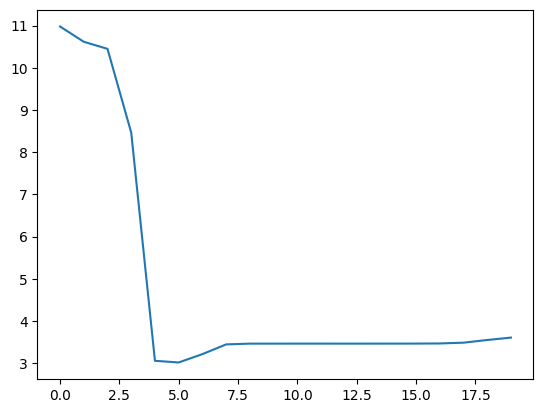

In [147]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])